# Preparing raw data

This example briefly shows how to prepare raw for `PeakPerformance`.  
  
Extracted ion chromatograms from LC-MS/MS analyses are essentially time series with time in the first and signal intensity in the second dimension.
This is represented by a NumPy array of shape `(2, ?)` (see also the example data in the repository).
Both time and intensity should also be NumPy arrays.  
  
The final section describes and demonstrates with an example __how to connect `PeakPerformance` to regular LC-MS/MS raw data files__ in the vendor-specific format.

In [5]:
import numpy as np
from pathlib import Path

## Example for opening `*.npy` raw data files

In [8]:
path = Path("./paper raw data/exemplary results raw data/A1t1R1Part2_110_109.9_110.1.npy")
timeseries = np.load(path)
print(f"time (1st dimension): {timeseries[0]}, \n\nintensity (2nd dimension): {timeseries[1]}")

time (1st dimension): [24.50585    24.55131667 24.59676667 24.64223333 24.68768333 24.73315
 24.7786     24.82406667 24.86953333 24.91498333 24.96045    25.0059
 25.05136667 25.09681667 25.14228333 25.18773333 25.2332     25.27866667
 25.32411667 25.36958333 25.41503333 25.4605     25.50595    25.55141667
 25.59686667 25.64233333 25.6878     25.73325    25.77871667 25.82416667
 25.86963333 25.91508333 25.96055    26.006      26.05146667 26.09691667
 26.14238333 26.18785    26.2333     26.27876667 26.32421667 26.36968333
 26.41513333 26.4606     26.50605    26.55151667 26.59698333 26.64243333
 26.6879     26.73335    26.77881667 26.82426667 26.86973333 26.91518333
 26.96065    27.00611667 27.05156667 27.09703333 27.14248333 27.18795
 27.2334     27.27886667 27.32431667 27.36978333 27.41523333 27.4607
 27.50616667 27.55161667 27.59708333 27.64253333 27.688      27.73345
 27.77891667 27.82436667 27.86983333 27.9153     27.96075    28.00621667
 28.05166667 28.09713333 28.14258333 28.18805 

## Example for saving time and intensity data in the correct manner

In [23]:
# create sequential time and random intensity data and convert it to lists
time_example = list(np.arange(20))
intensity_example = list(np.random.rand(1,20)[0])

print(f"time: {time_example}, type: {type(time_example)}")
print(f"time: {intensity_example}, type: {type(intensity_example)}")

time: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], type: <class 'list'>
time: [0.4220648705921751, 0.7368499814029064, 0.29413385189442887, 0.6015391666617104, 0.7561894333200414, 0.21586092727799466, 0.8380184043441182, 0.7151767470066769, 0.024501559891177527, 0.3493908917468723, 0.9183530952812738, 0.3931863463526398, 0.8217456348829356, 0.35978298949126863, 0.4274512094231292, 0.6855420648111887, 0.4028000417877422, 0.8127438126752059, 0.11549370457269648, 0.5849690139824473], type: <class 'list'>


In [24]:
# create the array with time in first and intensity in second dimension
# also convert the lists to NumPy arrays

timeseries_example = np.array([np.array(time_example), np.array(intensity_example)])
print(timeseries_example)

[[ 0.          1.          2.          3.          4.          5.
   6.          7.          8.          9.         10.         11.
  12.         13.         14.         15.         16.         17.
  18.         19.        ]
 [ 0.42206487  0.73684998  0.29413385  0.60153917  0.75618943  0.21586093
   0.8380184   0.71517675  0.02450156  0.34939089  0.9183531   0.39318635
   0.82174563  0.35978299  0.42745121  0.68554206  0.40280004  0.81274381
   0.1154937   0.58496901]]


The naming convention of raw data files is `<acquisition name>_<precursor ion m/z or experiment number>_<product ion m/z start>_<product ion m/z end>.npy`.
There should be no underscores within the named sections such as `acquisition name` because they are just in the program as delimiters so separate the sections.  
Essentially, the raw data names include the acquisition and mass trace, thus yielding a recognizable and unique name for each isotopomer/fragment/metabolite/sample.  

This is of course __only relevant when using the pre-manufactured data pipeline or the `UserInput` class__ and does not apply to user-generated custom data pipelines.

Suppose for the sake of this example that your acquistion is called `Sample A1` and you want to analyze the peak of alanine which was analyzed in positive ionization mode.
The mass transition in question is then from 90 Da (pre-cursor ion m/z) to 44 Da (product ion m/z). As a TOF range for the product ion, you might choose 43.9 Da to 44.1 Da.
Given this information and based on the naming convention detailed above, the file should be named as follows:  
  
`Sample A1_90_43.9_44.1.npy`

In [25]:
# save the timeseries in the current directory using the correct name

np.save("Sample A1_90_43.9_44.1.npy", timeseries_example)

## Connecting PeakPerformance to raw data in proprietary data formats

Since we used a Sciex TripleTOF6600 QqTOF device, the raw data was provided as `*.wiff` and `*.wiff.scan` files which are proprietary, binary file types.
Most vendors have similarly opaque data formats which can not be opened except by using the vendor software.
These files have to be converted to a free data format like `*.mzML` using the open-source software `ProteoWizard` which you can find [here](https://proteowizard.sourceforge.io/).
Follow the instructions in their documentation to convert your data files.  
The data file for this example is located under `./paper raw data/exemplary results raw data` and since the `*.mzML` version of the file was too large for our GitHub storage, you can download it from [release v0.7.1](https://github.com/JuBiotech/peak-performance/releases/edit/v0.7.1) to which it was attached.
Alternatively, you can easily convert the original file using `ProteoWizard`.  
  
When you have completed this, you will find an example of how to open an `*.mzML` using the Python package `pyteomics` and obtaining an extracted ion chromatogram.
Since `pyteomics` is not usually needed to use `PeakPerformance`, it is not installed with the package.
Hence, install it in your environment following the instructions [in their documentation](https://pyteomics.readthedocs.io/en/latest/installation.html).

In [1]:
import numpy as np

from pyteomics import mzml
from matplotlib import pyplot as plt

In [2]:
# load the exemplary mzML file
with mzml.MzML(r"./paper raw data/connection to traditional data formats/A1_t1_1_Part2.mzML") as reader:
    # just to be able to see what is inside the file, pack everything into the data list
    data = [spectrum for spectrum in reader]

In [3]:
# choose your experiment number
# in Sciex .wiff files, an experiment number pertains to one specific product ion scan
exp = "experiment=14"

# filter the total data based on the experiment number to obtain the TOF (MS2) data for this product ion scan
filtered_data = [spectrum for spectrum in data if exp in spectrum["id"] and spectrum["id"][-1] == exp[-1] and spectrum["id"][-2] == exp[-2]]

In [4]:
# Define your TOF m/z range
mz_min = 43.9
mz_max = 44.1

# Extract the TOF m/z range from the filtered data
extracted_data = []

for spectrum in filtered_data:
    mz_array = spectrum['m/z array']
    intensity_array = spectrum['intensity array']
    within_range = [(mz, intensity) for mz, intensity in zip(mz_array, intensity_array) if mz_min <= mz <= mz_max]
    
    if within_range:
        extracted_data.append({'within_range': within_range, 'scan_time': spectrum['scanList']['scan'][0]['scan start time']})

# Extract the time and intensity values
time_values = [spectrum["scan_time"] for spectrum in extracted_data]
time_values = np.array(time_values)
intensity_values = [spectrum['within_range'] for spectrum in extracted_data]
intensity_sums = np.array([sum(intensity for _, intensity in spectrum) for spectrum in intensity_values])

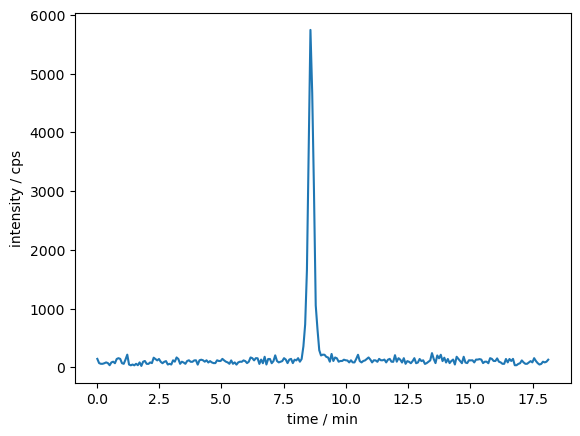

In [5]:
plt.plot(time_values, intensity_sums)
plt.xlabel("time / min")
plt.ylabel("intensity / cps")
plt.show()

As stated in the chapter of the `PeakPerformance` documentation detailing its workflow, it is necessary to reduce the time window before using `PeakPerformance`.  
A time frame of 3 - 5 times the peak width is a good rule of thumb.

In [6]:
data_dict = tuple(zip(time_values, intensity_sums))
data_selection = [t for t in data_dict if 7 <= t[0] <= 10.5]
print(data_selection)

[(7.024266666667, 70.0), (7.094983333333, 106.0), (7.1657, 204.0), (7.236416666667, 108.0), (7.307116666667, 84.0), (7.377833333333, 96.0), (7.44855, 106.0), (7.519266666667, 156.0), (7.589983333333, 132.0), (7.6607, 72.0), (7.731416666667, 132.0), (7.802116666667, 144.0), (7.872833333333, 72.0), (7.94355, 130.0), (8.014266666667, 118.0), (8.084983333333, 156.0), (8.1557, 96.0), (8.226416666667, 142.0), (8.297116666667, 357.0), (8.367833333333, 731.0), (8.43855, 1655.0), (8.509266666667, 3735.0), (8.579983333333, 5745.0), (8.6507, 4673.0), (8.721416666667, 3007.0), (8.792116666667, 1055.0), (8.862833333333, 646.0), (8.93355, 291.0), (9.004266666667, 202.0), (9.074983333333, 216.0), (9.1457, 214.0), (9.216416666667, 178.0), (9.287116666667, 168.0), (9.357833333333, 96.0), (9.42855, 228.0), (9.499266666667, 108.0), (9.569983333333, 168.0), (9.6407, 154.0), (9.711416666667, 96.0), (9.782116666667, 108.0), (9.852833333333, 108.0), (9.92355, 130.0), (9.994266666667, 120.0), (10.064983333333

Text(0, 0.5, 'intensity / cps')

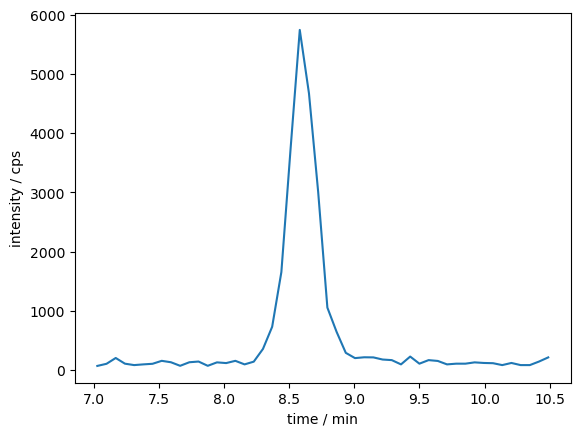

In [7]:
time_selected = [x[0] for x in data_selection]
intensity_selected = [x[1] for x in data_selection]
plt.plot(time_selected, intensity_selected)
plt.xlabel("time / min")
plt.ylabel("intensity / cps")

In [8]:
%load_ext watermark
%watermark -idu

Last updated: 2024-11-08T19:56:01.696601+01:00

